In [1]:
import os
os.environ['JAX_PLATFORMS']="cpu"

import jax 
from jax import numpy as jnp

import matplotlib.pyplot as plt
import numpy as np

In [5]:
a = jnp.arange(4*12*25)
a = a.reshape(4,12,25)
b = jnp.sum(a, axis=jnp.arange(1, a.ndim))
c = jnp.mean(b)
b.shape, c.shape

((4,), ())

In [20]:
sigma_min=0.002
sigma_max=80.
sigma_data=0.5
rho=7
P_mean=-1.2
P_std=1.2

In [21]:
def time_schedule(u):
    return (sigma_max**(1/rho) + u*(sigma_min**(1/rho) - sigma_max**(1/rho)))**rho

def sigma(t):
    # also known as the schedule, as in tab 1 of EDM paper
    return t

In [22]:
nsamples=10000

In [47]:
# versione 1
u = 0#jax.random.uniform(jax.random.PRNGKey(0), shape=(nsamples,))
t = time_schedule(u)
sigma_t = sigma(t)
print("sigma: ", sigma_t)

sigma:  80.0


In [24]:
# versione 2
rnd_normal = jax.random.normal(jax.random.PRNGKey(0), (nsamples,))
sigma_t_v2 = jnp.exp(rnd_normal * P_std + P_mean)

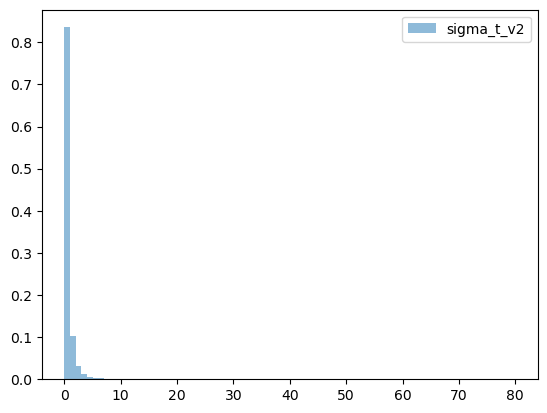

In [32]:
# plt.hist(sigma_t, bins=40, alpha=0.5, label='sigma_t', range=(0, 20), density=True)
plt.hist(sigma_t_v2, bins=80, alpha=0.5, label='sigma_t_v2', range=(0, 80), density=True)
plt.legend(loc='upper right')
plt.show()


In [45]:
jnp.exp(-3*1.2)

Array(0.02732372, dtype=float32, weak_type=True)

In [33]:
jnp.max(sigma_t_v2)

Array(23.421453, dtype=float32)

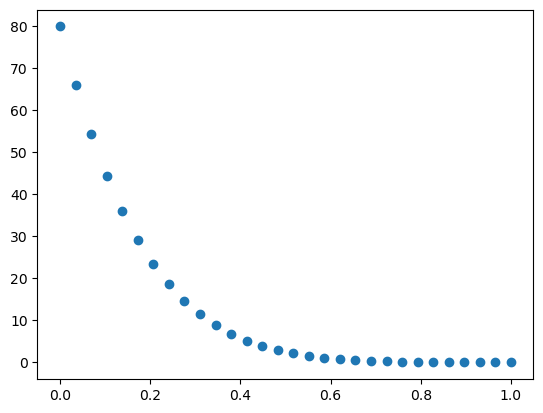

In [42]:
t = jnp.linspace(0,1,30)
plt.scatter(t, sigma(time_schedule(t)))
# plt.yscale("log")
plt.show()

In [48]:
nsteps = 1000
keys = jax.random.split(jax.random.PRNGKey(0), nsteps)
i = jnp.arange(nsteps)

In [51]:
keys

Array([[2615604937, 1821629751],
       [ 331609114, 2540088542],
       [  62694249, 3219724671],
       ...,
       [2744197942, 3392345896],
       [3019838301,  111166463],
       [3609926923, 3750703181]], dtype=uint32)

In [49]:
jnp.stack([keys, i], axis=-1)

ValueError: All input arrays must have the same shape.

In [77]:
def edm_sampler(
    x, key,
    num_steps=18,
    method="heun",
    model_kwargs={},
):

    # Main sampling loop.
    x_next = x

    def one_step(carry, args):
        x_next, key = carry
        key, subkey = jax.random.split(key)
        i, t_cur, t_next = args
        # print(i)
        x_curr = x_next + i#*jax.random.normal(subkey,(1,))

        return (x_curr, key), None
        
    i = jnp.arange(num_steps)
    t_cur = jnp.arange(num_steps)
    t_next = jnp.arange(num_steps)
    args = (i, t_cur, t_next) 
    #dict(i=i, t_cur=t_cur, t_next=t_next)
    carry, _ = jax.lax.scan(one_step, (x_next, key), args)
    return carry[0]

In [78]:
x = jnp.zeros(1)
key = jax.random.PRNGKey(0)
x = edm_sampler(x, key, num_steps=1000)

In [70]:
x

Array([499500.], dtype=float32)

In [71]:
jnp.sum(i)

Array(499500, dtype=int32)